**Overview:**
* Fundamentals
* Neural Network Regression with TensorFlow
* Time series forecasting in TensorFlow
* Transfer Learning with Tensorflow for Time Series

# Fundamentals

> What is a tensor? https://www.youtube.com/watch?v=f5liqUk0ZTw

The main difference between tensors and NumPy arrays (also an n-dimensional array of numbers) is that tensors can be used on GPUs (graphical processing units) and TPUs (tensor processing units).

**Topics:** 
* Creating tensors
* Tensor attributes
* Tensor operations
* Using @tf.function

**Links:**
* Tensorflow API: https://www.tensorflow.org/api_docs/python/tf/all_symbols
* Guthub: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/00_tensorflow_fundamentals.ipynb

### 1. Creating Tensors

**Basic definitions:** 
* scalar: a single number.
* vector: a number with direction (e.g. wind speed with direction).
* matrix: a 2-dimensional array of numbers.
* tensor: an n-dimensional array of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).

> 🔑 Note: A matrix or tensor is typically represented by a capital letter (e.g. X or A) where as a vector is typically represented by a lowercase letter (e.g. y or b).

**Basic commands:**
* tf.constant()
* tf.ndim()
* tf.Variable()
* tf.assign()
* tf.random.Generator.from_seed(42)
* tf.normal()
* tf.random.shuffle()
* tf.ones()
* tf. zeros()


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # find the version number (should be 2.x+)


# Create a scalar (rank 0 tensor)
scalar = tf.constant(7)
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
# Check the number of dimensions of our vector tensor
vector.ndim

# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]], dtype=tf.float16)  #specify the datatype with 'dtype'
# Check the number of dimensions of our matrix tensor
matrix.ndim

# Create a tensor (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
# Check the number of dimensions of our tensor
tensor.ndim

# Make a tensor of all ones
tf.ones(shape=(3, 2))

# Make a tensor of all zeros
tf.zeros(shape=(3, 2))

# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])

# Assign new value to the variable tensor
changeable_tensor[0].assign(7)

# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution 
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
# Check for equality
random_1, random_2, random_1 == random_2

# Create two random (and different) tensors
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3, 2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3, 2))
# Check the tensors and see if they are equal
random_3, random_4, random_1 == random_3, random_3 == random_4

# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

# Shuffle in the same order every time
# Set the global random seed
tf.random.set_seed(42)
# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42)

2.10.0


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

### 2. Tensor attributes - Getting informations from tensors

**Basic definitions:** Getting information from tensors (shape, rank, size)
* Shape: The length (number of elements) of each of the dimensions of a tensor.
* Rank: The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.
* Axis or Dimension: A particular dimension of a tensor.
* Size: The total number of items in the tensor.

**Basic commands:**
* tf.newaxis
* tf.expand_dims()
* tensor[:2, :2, :2, :2]

In [2]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

# Get the first 2 items of each dimension
rank_4_tensor[:2, :2, :2, :2]

# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

# Get the last item of each row
rank_4_tensor[:, -1]

# Add an extra dimension (to the end)
rank_5_tensor = rank_4_tensor[..., tf.newaxis] # in Python "..." means "all dimensions prior to"
#You can achieve the same using tf.expand_dims().
tf.expand_dims(rank_4_tensor, axis=-1) # "-1" means last axis

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


<tf.Tensor: shape=(2, 3, 4, 5, 1), dtype=float32, numpy=
array([[[[[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
     

### 3. Tensor operations

**Basic commands:** <br>

Operations

* tensor + 10 / - 10 / * 10
* tf.multiply()

Reshaping:

* tf.reshape() - allows us to reshape a tensor into a defined shape.
* tf.transpose() - switches the dimensions of a given tensor.

Matrix multiplication:

* tf.matmul() / @
* tf.tensordot()

Aggregation

* tf.reduce_min() - find the minimum value in a tensor.
* tf.reduce_max() - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
* tf.reduce_mean() - find the mean of all elements in a tensor.
* tf.reduce_sum() - find the sum of all elements in a tensor.

Other

* tf.argmax() - find the position of the maximum element in a given tensor.
* tf.argmin() - find the position of the minimum element in a given tensor.
* tf.cast()
* tf.square() - get the square of every value in a tensor.
* tf.sqrt() - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error).
* tf.math.log() - get the natural log of every value in a tensor (elements need to floats).
* np.array() - pass a tensor to convert to an ndarray (NumPy's main datatype).
* tensor.numpy() - call on a tensor to convert to an ndarray.

> Note: typically, each of these is under the math module, e.g. tf.math.reduce_min() but you can use the alias tf.reduce_min().

* tf.squeeze() - remove all dimensions of 1 from a tensor.

> Note: If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use tf.squeeze().

* tf.one_hot()

In [3]:
# Import Numpy
import numpy as np

tensor = tf.constant([[10, 7], [3, 4]])

# Addition operator
tensor + 10

# Subtraction
tensor - 10

# Multiplication (known as element-wise multiplication)
tensor * 10
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

# Matrix multiplication in TensorFlow
tf.matmul(tensor, tensor)
# Matrix multiplication with Python operator '@'
tensor @ tensor

# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

# Example of reshape (3, 2) -> (2, 3)
tf.reshape(Y, shape=(2, 3))

# Example of transpose (3, 2) -> (2, 3)
tf.transpose(X)

# You can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, (2, 3)))

# Check shapes of Y, reshaped Y and tranposed Y
Y.shape, tf.reshape(Y, (2, 3)).shape, tf.transpose(Y).shape

# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(Y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))


# Create tensor with negative values
D = tf.constant([-7, -10])
# Get the absolute values
tf.abs(D)
# Change from float32 to float16 (reduced precision)
D = tf.cast(D, dtype=tf.float16)

# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
# Find the minimum
tf.reduce_min(E)
# Find the maximum
tf.reduce_max(E)
# Find the mean
tf.reduce_mean(E)
# Find the sum
tf.reduce_sum(E)

# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
# Find the maximum element position of F
tf.argmax(F)
# Find the minimum element position of F
tf.argmin(F)

# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}") 
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}") 
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

# Create a new tensor
H = tf.constant(np.arange(1, 10))

# Square it
tf.square(H)
# Change H to float32
H = tf.cast(H, dtype=tf.float32)
# Find the square root
tf.sqrt(H)
# Find the log (input also needs to be float)
tf.math.log(H)

# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))
# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)
The maximum value of F is at position: 30
The maximum value of F is: 0.9806097789011675
Using tf.argmax() to index F, the maximum value of F is: 0.9806097789011675
Are the two max values the same (they should be)? True


(tf.float64, tf.float32)

### 4. Using @tf.function

In the @tf.function decorator case, it turns a Python function into a callable TensorFlow graph. Which is a fancy way of saying, if you've written your own Python function, and you decorate it with @tf.function, when you export your code (to potentially run on another device), TensorFlow will attempt to convert it into a fast(er) version of itself (by making it part of a computation graph).

In [4]:
x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))

# Create function and decorate it with tf.function
@tf.function
def tf_function(x, y):
    return x ** 2 + y

tf_function(x, y)

print(tf.config.list_physical_devices('GPU'))
!nvidia-smi

[]
Mon Dec 12 14:00:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:0A:00.0  On |                  N/A |
| N/A   35C    P0    N/A /  19W |   1160MiB /  2048MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+----

# Neural Network Regression with TensorFlow

> What is a regression? -> Predicting a number / https://en.wikipedia.org/wiki/Regression_analysis


**Topics:** 
* Architecture
* Data
* Model building (Create model, compile model, fitting model)
* Evaluating a model (Visualizing, training curves, metrics)
* Saving and loading a model

**Links:**
* MIT lecture: https://www.youtube.com/watch?v=njKP3FqW3Sk
* Github: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

### 1. Architecture of a regression neural network

> 🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

**Common ways to improve a deep model:**
* Adding layers
* Increase the number of hidden units
* change the activation functions
* Change the optimization function (SGD, Adam)
* Change the learning rate
* Fitting on more data
* Fitting for longer

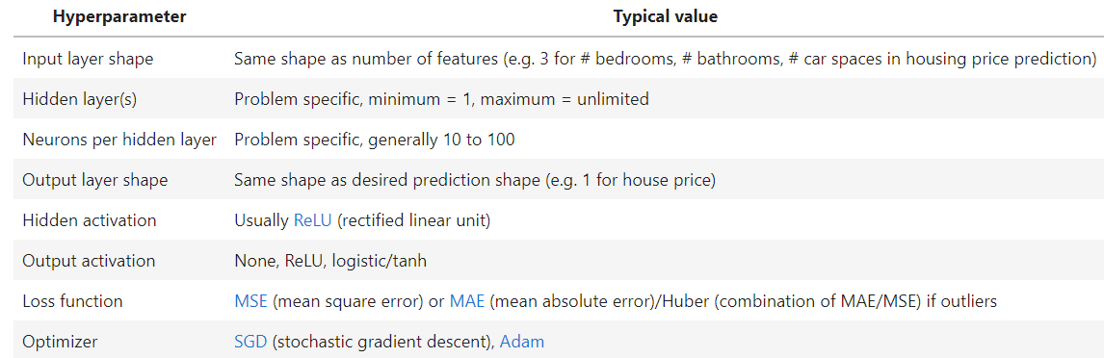

In [5]:
from IPython.display import Image
Image(filename='img/Hyperparameter_regression.png') 

### 2. Data

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [6]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
# Make labels for the dataset (adhering to the same pattern as before), same result as y = X + 10
y = np.arange(-90, 110, 4)

# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

print(len(X_train), len(X_test))

40 10


### 3. Model building (Create model, compile model, fitting model)

> Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In [54]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

#Summaruze model
model.summary()

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 54.5151 - mae: 54.5151
Epoch 2/100
2/2 [==============================] - 0s 999us/step - loss: 48.2871 - mae: 48.2871
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 42.8442 - mae: 42.8442
Epoch 4/100
2/2 [==============================] - 0s 1000us/step - loss: 36.9870 - mae: 36.9870
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 31.1493 - mae: 31.1493
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 25.5195 - mae: 25.5195
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 19.6646 - mae: 19.6646
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 14.2125 - mae: 14.2125
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 10.6990 - mae: 10.6990
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6413 - mae: 9.6413
Epoch 11/100
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 1ms/step - loss: 5.5677 - mae: 5.5677
Epoch 89/100
2/2 [==============================] - 0s 1000us/step - loss: 5.5011 - mae: 5.5011
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 5.4407 - mae: 5.4407
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 5.3692 - mae: 5.3692
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 5.2988 - mae: 5.2988
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 5.2200 - mae: 5.2200
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 5.1019 - mae: 5.1019
Epoch 95/100
2/2 [==============================] - 0s 1000us/step - loss: 4.9688 - mae: 4.9688
Epoch 96/100
2/2 [==============================] - 0s 1000us/step - loss: 4.8474 - mae: 4.8474
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 4.7809 - mae: 4.7809
Epoch 98/100
2/2 [==============================] - 0s 1ms/step - loss: 4.

In [55]:
# Make predictions
y_preds = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 30ms/step


### Evaluating a model (Visualizing, training curves, metrics)

**Visualize:**

* The data - what data are you working with? What does it look like?
* The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

**Metrics:**
* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

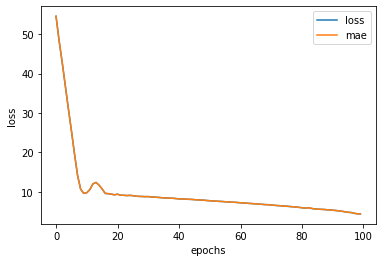

In [56]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

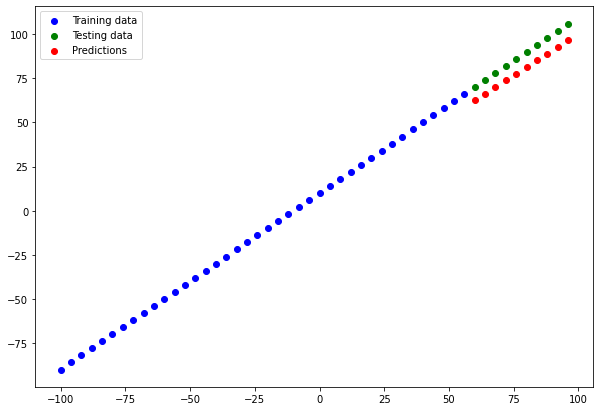

In [57]:
#Import Matplotlib
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [41]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

def mae(y_test, y_pred):
    """
    Calculuates mean absolute error between y_test and y_preds.
    
    mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
    """
    return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_preds.
    
    mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
    """
    return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds.squeeze()).numpy()
mse_1 = mse(y_test, y_preds.squeeze()).numpy()

import pandas as pd
model_results = [["Mae_1", mae_1, mse_1],
                 ["mse_1", mse_1, mse_1],
                 ]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

1/1 [==============================] - 0s 12ms/step - loss: 18.7472 - mae: 18.7472


,model,mae,mse
0,Mae_1,18.747196,353.871338
1,mse_1,353.871338,353.871338


### Saving and loading a model

There are two ways to save a model in TensorFlow:

* The SavedModel format (default).
* The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use? -> It depends on your situation but the SavedModel format will suffice most of the time.

In [60]:
# Save a model using the SavedModel format
model.save('best_model_SavedModel_format')

"""
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end
"""

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000020A01EBFBE0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000020A01EBFBE0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

'\n# Save a model using the HDF5 format\nmodel_2.save("best_model_HDF5_format.h5") # note the addition of \'.h5\' on the end\n# Save a model using the HDF5 format\nmodel_2.save("best_model_HDF5_format.h5") # note the addition of \'.h5\' on the end\n'

In [61]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               200       
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


# Time series forecasting in TensorFlow

Overview: 
* Discussing two different types of uncertainty in machine learning (data uncertainty and model uncertainty)
* Format data
* Evaluating time series forecasting models
* Setting up a series of deep learning modelling experiments
* Creating a modelling checkpoint to save the best performing model during training
* Making predictions (forecasts) with a time series model
* Creating prediction intervals for time series model forecasts
* 

###  Discussing two different types of uncertainty in machine learning (data uncertainty and model uncertainty)

In [66]:
# Import with pandas 
import pandas as pd

#Define Path to datafile
user = 'rs1044' #'Jonas'
filename = 'Data_0242-ZE01-70_30_1_2006 bis 18_10_2022.csv'
path = 'C:/Users/' + user + '/bwSyncShare/02Python Code/Data/' + filename

#Read CSV file to pandas dataframe
#encoding= 'unicode_escape': Decode from Latin-1 source code. Default UTF-8.
df = pd.read_csv(path, 
                 parse_dates=["Datum"], 
                 index_col=["Datum"],
                 encoding= 'unicode_escape')
#Drop column Einheit
df.drop('Einheit', axis=1, inplace=True)

df.head()

,Wert
Datum,
2006-03-01 00:15:00,8.85344
2006-03-01 00:30:00,9.70656
2006-03-01 00:45:00,8.74688
2006-03-01 01:00:00,8.85312
2006-03-01 01:15:00,8.74688


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588668 entries, 2006-03-01 00:15:00 to 2022-10-16 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Wert    588668 non-null  float64
dtypes: float64(1)
memory usage: 9.0 MB


,count,mean,std,min,25%,50%,75%,max
Wert,588668.0,20.728145,38.56253,-9493.77056,12.8,22.71776,28.26368,23713.46816


,Wert
Datum,
2006-03-01 00:15:00,8.85344
2006-03-01 00:30:00,9.70656


None

'Outliers: 67 Negative Outliers: 4 Missing values: 64206 NaN values: 0'

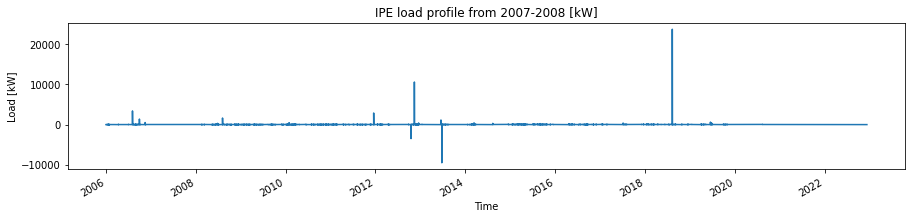

In [68]:
#1.2 Data Visualization

#Describe + Head Dataframe
display(df.describe().transpose(), df.head(2), df.info())
#Display Outliers
display("Outliers: " + str(df.loc[(df.Wert - df.Wert.rolling(3).median().abs()) > 38, "Wert"].count()) + 
       " Negative Outliers: " +  str(df.loc[df.Wert < 0, "Wert"].count()) + 
       " Missing values: " +  str(df.loc[df.Wert == 0, "Wert"].count()) + 
        " NaN values: " +  str(df.loc[df.Wert == np.nan, "Wert"].count())
       )
#Plot all values in column Wert, use _ to hide instance output
_ = df.Wert.plot(title="IPE load profile from 2007-2008 [kW]", 
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="Load [kW]",
             kind="line"
            )         

In [71]:
#1.3 Data Processing - Cleaning, Formatting, Normailzation
#statistical data visualization
import seaborn as sns
import datetime


#Cleaning
#No negative values: Replace negative values,with median of last three values
df.loc[df.Wert < 0, "Wert"] = df.Wert.rolling(3).median().abs()



C:\Users\rs1044\AppData\Local\Temp\ipykernel_14600\528947960.py:9: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df.loc[df.Wert < 0, "Wert"] = df.Wert.rolling(3).median().abs()


ValueError: cannot reindex on an axis with duplicate labels